In [68]:
from ipywidgets import interact, widget, interact_manual

import ipywidgets as widgets


from IPython.display import display, Math
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import collections

# Tutorial on von Neumann-Morgenstern Theorem


In [69]:
import re

a = 'a'
b = 'b'
c = 'c'

X = set([a, b, c])


def is_relation_on_X(R):

    return all([((x[0] in X) and (x[1] in X)) for x in R])


def is_complete(X, R):
    is_comp = True
    exp = list()
    for x in X:
        for y in X:
            if (x, y) not in R and (y, x) not in R:
                if (x, y) not in exp:
                    exp.append((x, y))
                is_comp = False
    return is_comp, exp


def is_transitive(relation):
    is_trans = True
    counter_examples = list()
    # try to find a counterexample
    for a, b in relation:
        for c, d in relation:
            if b == c and ((a, d) not in relation):
                counter_examples.append([(a, b), (b, d), (a, d)])
                # print (a,b),(c,d) # uncomment for tests...
                is_trans = False
    return is_trans, counter_examples


def check_relation(rel_string):

    _R = rel_string.strip()[1:-1]

    _R = re.findall('\([\s]*[\w][\s]*,[\s]*[\w][\s]*\)', _R)
    R = [(t.split(",")[0][1:].strip(), t.split(",")[1][:-1].strip())
         for t in _R]
    if is_relation_on_X(R):
        is_comp, exp = is_complete(X, R)
        if is_comp:
            print(f"the entered relation is complete.")
        else:
            #exp_str = '\n'.join(exp)
            print(f"the entered relation is not complete:")
            for ex in exp:
                display(
                    Math(
                        f"({ex[0]}, {ex[1]})\\not\\in R, \\ \\ ({ex[1]}, {ex[0]})\\not\\in R"
                    ))
            #display(Math(f"{exp_str}"))
        is_trans, exp = is_transitive(R)
        if is_trans:
            print(f"the entered relation is transitive.")
        else:
            print("the entered relation is not transitive:")
            for ex in exp:
                display(
                    Math("(" + ex[0][0] + ", " + ex[0][1] + ")\\in R, " + "(" +
                         ex[1][0] + ", " + ex[1][1] +
                         ")\\in R, \\mbox{ but }" + "(" + ex[2][0] + ", " +
                         ex[2][1] + ")\\not\\in R"))
    else:
        display(
            Math("\mbox{The entered relation: }" + rel_string +
                 "\mbox{ is not a relation on $\{a,b,c\}$}"))

## Preferences 

Let $X$ be a set. A  **relation** $R$ on a set $X$ is  a subset of $X\times X$ (the set of pairs of elements from $X$).  That is, $R$ is a relation on $X$ means that   $R\subseteq X\times X$.   It is often convenient  to write $a\mathrel{R}b$ for $(a,b)\in R$.    To simplify our notation we write $x\mathrel{R}y$ when $(x,y)\in R$.  

An example of a relation on the set $\{a,b,c\}$ is  $\{(a,a), (a,b), (b,c), (c,a)\}$

We are interested in using relations on a set $X$ to represent a decision maker's *preferences* over the objects in $X$.   

We are typically not interested in any relation on $X$, but rather relations that satisfy certain properties.   The key properties that we study are: 


* $R$ is  **reflexive** provided that  for all $x\in X$, $x\mathrel{R}x$.
* $R$ is  **irreflexive** provided that for all $x\in X$,  it is not the case that $x\mathrel{R} x$.
* $R$ is  **complete** provided that for all $x,y\in X$, $x\mathrel{R} y$ or $y\mathrel{R} y$ (or both).
* $R$ is **transitive** provided that for all $x,y,z\in X$, if $x\mathrel{R} y$ and $y\mathrel{R} z$ then $x\mathrel{R} z$. 

To illustrate, in the box below enter a relation.   Find three different relations:

1. A relation $R$ that is complete but not transitive.
2. A relation $R$ that is transitive but not complete.
3. A relation $R$ that is both transitive and complete. 

In [70]:
interact(check_relation, rel_string=widgets.Text(
    value='{(a,b), (b,c),  (c,c)}',
    placeholder='{(a,b), (b,c), (c,c)}',
    description='$R=$',
    disabled=False
))
print("")

interactive(children=(Text(value='{(a,b), (b,c),  (c,c)}', description='$R=$', placeholder='{(a,b), (b,c), (c,…

Let $X$ be a set and $R\subseteq X\times X$.   We say that $R$ is a **rational** preference relation provided that $R$ is complete and transitive. 

**Example**: Let $X=\{a,b,c\}$ and $R=\{(a,b), (b,a), (b,c), (a,c), (a,a), (b,b), (c,c)\}$.   Then, $R$ is complete and transitive, so $R$ is a rational preference relation on $X$.  This relation $R$ describes a decision maker that: 
1. is indifferent between $a$ and $b$;
2. strictly prefers $a$ over $c$; and
3. strictly prefers $b$ over $c$. 

Given a rational preference relation $R$ on $X$, we define the following: 

* **Strict Preference**:  $P_R\subseteq X\times X$ is the relation where for all $x,y\in X$, $(x,y)\in P_R$ if, and only if, $(x,y)\in R$ and $(y,x)\not\in R$.  
* **Indifference**:  $I_R\subseteq X\times X$ is the relation where for all $x,y\in X$, $(x,y)\in I_R$ if, and only if, $(x,y)\in R$ and $(y,x)\in R$.  

We sometimes use $\succeq$ to denote a preference relation instead of $R$.   Then, $\succ$ is the strict preference relation generated by $\succeq$ and $\sim$ is the indifference relation generated by $\succeq$.


## Utility 

A **utility** on a set $X$ is a function $u:X\rightarrow\mathbb{R}$, where $\mathbb{R}$ is the set of real numbers.

**Representing a Preference Ordering**:  Suppose that $R\subseteq X\times X$ is a preference ordering.   We say that  $R$ is **representable by a utility function** provided that there is a $u:X\rightarrow \mathbb{R}$ such that for all $x,y\in X$, $x R y$ iff $u(x)\ge u(y)$.


For example, suppose that $X=\{a,b,c,d\}$ and $R$ is the rational preference relation where:
1. $b \mathrel{P_R} a$
2. $a \mathrel{I_R} c$, and 
3. $c \mathrel{P_R} d$.

Find two utility functions that represent this preference relation.


In [71]:
def does_represent(a, b, c, d):
    if (b > a) and (a == c) and (c > d):
        display(Math("\mbox{The utility represents the preference ordering $R$}"))
    else:
        if not b > a:
            display(Math("u(b) \\not > u(a)"))
        if  a != c:
            display(Math("u(a) \\ne u(c)"))
        if not  c > d:
            display(Math("u(c) \\not >  u(d)"))


interact(does_represent,
         a=widgets.FloatText(value=None, description='$u(a)=$',
                             disabled=False),
         b=widgets.FloatText(value=None, description='$u(b)=$',
                             disabled=False),
         c=widgets.FloatText(value=None, description='$u(c)=$',
                             disabled=False),
         d=widgets.FloatText(value=None, description='$u(d)=$',
                             disabled=False))
print()

interactive(children=(FloatText(value=0.0, description='$u(a)=$'), FloatText(value=0.0, description='$u(b)=$')…

*This section can be skipped on a first reading.   It contains some of the mathematical details.*

The key observation is that every rational preference relation is representable by a utility function.  

**Utility Theorem**.  Suppose that  $X$ is a finite set.   A relation $\succeq\subseteq X\times X$ is a rational preference ordering if, and only if, $\succeq$ is representable by a utility function. 

*Proof*. We leave it to the reader to show that if $R$ is representable by a utility function, then $R$ is transitive and complete.  

We prove the following: For all $n\in\mathbb{N}$, any preference relation $\succeq$ on a set of size $n$ is representable by a utility function $u_\succeq:X\rightarrow\mathbb{R}$.     The proof is by induction on the size of the set of objects $X$.   The base case is when $|X|=1$. In this case,  $X=\{a\}$ for some object $a$.  If $\succeq$ is a transitive and complete ordering on $X$, then $\succeq=\{(a,a)\}$.     Then, $u_\succeq(a)=0$ (any real number would work here) clearly represents $\succeq$.    The induction hypothesis is: if $|X|=n$, then any preference ordering on $X$ is representable.    Suppose that $|X|=n+1$ and $\succeq$ is a preference ordering on $X$.  Then, $X=X'\cup \{a\}$ for some object $a$, where $|X'|=n$.   Note that the restriction\footnote{If $R$ is a relation on $X$ and $Y\subseteq X$, then $R_Y\subseteq Y\times Y$ is the  {\bf restriction of $R$ to $Y$} provided for all $a,b\in Y$, $a\mathrel{R_Y} b$ iff $a\mathrel{R} b$.}  of $\succeq$ to $X'$, denoted $\succeq'$, is a preference ordering on $X'$.  By the induction hypothesis, $\succeq'$ is representable by a utility function $u_{\succeq'}:X'\rightarrow \mathbb{R}$.  We will show how to extend $u_{\succeq'}$ to a utility function $u_{\succeq}:X\rightarrow \mathbb{R}$ that represents $\succeq$.  For all $b\in X'$, let $u_\succeq(b)=u_{\succeq'}(b)$.  For the object $a$ (the unique object in $X$ but not in $X'$), there are four cases: 

1. $a\succ b$ for all $b\in X'$.   Let $u_\succeq(a)=\max\{u_{\succeq'}(b)\ |\ b\in X'\}+1$. 
2. $b\succ a$ for all $b\in X'$.  Let $u_\succeq(a)=\min\{u_{\succeq'}(b)\ |\ b\in X'\}-1$. 
3.  $a\sim b$ for some $b\in X'$.    Let $u_\succeq(a)=u_{\succeq'}(b)$. 
4. There are $b_1, b_2\in X'$ such that $b_\succ a\succ b_2$.  Let $u_\succeq(a)=\frac{u_{\succeq'}(b_1)+ u_{\succeq'}(b_2)}{2}$.

Then, it is straightforward to show that $u_\succeq:X\rightarrow\mathbb{R}$ represents $\succeq$ (the details are left to the reader). $\blacksquare$


*Remark*. The above proof can be extended to relations on infinite sets $X$.   However, additional technical assumptions are needed.   It is beyond the scope of this article to discuss these technicalities here.

It is not hard to see that if a preference relation is representable by a utility function, then it is representable by {\em infinitely} many different utility functions.  To make this more precise, say that a  function $f:\mathbb{R}\rightarrow\mathbb{R}$ is {\bf monotone} provided $r\ge  r'$ implies $f(r)\ge  f(r')$. 
 
**Lemma**. Suppose that $\succeq$ is representable by a utility function $u_\succeq$ and $f:\mathbb{R}\rightarrow\mathbb{R}$ is a monotone function.   Then, $f\circ u_\succeq$ also represents $\succeq$.  

*Proof.* The proof is immediate from the definitions:    Suppose that $a,b\in X$.   Then,  $a\succeq b$ iff $u_\succeq(a)\ge u_\succeq(b)$ (since $u$ represents $\succeq$) iff $f(u_\succeq(a))\ge f(u_\succeq(b))$ (since $f$ is monotone). $\blacksquare$


## Lotteries

Suppose that $X$ is a finite set.  A probability  on $X$ is a function $p:X\rightarrow [0,1]$ such that $\sum_{x\in X} p(x)=1$.   If $S\subseteq X$, then $p(S)=\sum_{x\in S} p(x)$. (Note: There are a number of mathematical details about probability measures that we are glossing over here.  Our discussion in this section is greatly simplified since we assume that the set of objects $X$ is finite.)  In the remainder of this section, elements of $X$ are called *prizes*, or *outcomes*. 

**Lottery**. Suppose that $Y=\{x_1,\ldots, x_n\}$ is a set of $n$ elements from $X$.  A lottery on $Y$ is denoted as follows: $ [ x_1:p_1,x_2:p_2,\ldots, x_n:p_n ] $ where each $p_i\ge 0$ and  $\sum_{i=1}^n p_i=1$.


We have defined lotteries for any subset of a fixed set $X$.   Without loss of generality, we can restrict attention to all lotteries on $X$.   For instance, suppose that $X=\{x_1,\ldots, x_n,y_1,\ldots, y_m\}$ and $L$ is a lottery on $Y=\{x_1,\ldots, x_n\}$.   That is, $L=[x_1:p_1,\ldots, x_n:p_n]$.   This lottery can be trivially extended to a lottery $L'$ over $X$ as follows: $$L'=[x_1:p_1,\ldots, x_n:p_n, y_1:0,\ldots, y_m:0].$$

Suppose that $X$ is a finite set.   Let $\mathcal{L}(X)$ be the set of lotteries on  $X$ (we often write $\mathcal{L}$ instead of $\mathcal{L}(X)$ to simplify notation).  There are two technical issues that need to be addressed.   

1.  First of all, we can identify elements $x\in X$ with lotteries $[x:1]$.    Thus, we may abuse notation and  say that "$X$ is contained in $\mathcal{L}$".  
2.  Second, we will need the notion of a  **compound lottery**.  Suppose that $L_1, \ldots, L_n$ are lotteries. Then, $[L_1:p_1,\ldots, L_n:p_n]$ is  the **compound lottery**, where $\sum_{i=1}^n p_i=1$.


We are interested in decision makers that have preferences over the set $\mathcal{L}$ of lotteries (on some fixed set $X$). We denote the decision maker's preferences on $\mathcal{L}$ by the relation $\succeq\mathcal{L}\times\mathcal{L}$. That is, given two lotteries $L_1\in \mathcal{L}$ and $L_2\in\mathcal{L}$, we assume that a decision maker has one of the following opinions: 

1. The decision maker strict prefers $L_1$ over  $L_2$ (denoted $L_1\succ L_2$).
2. The decision maker strict prefers $L_2$ over  $L_1$ (denoted $L_2\succ L_1$)
3. The decision maker is indifferent between $L_1$ and  $L_2$  (denoted $L_1\sim L_2$).
4. The decision maker cannot compare $L_1$ and  $L_2$.

   
Assuming that the decision maker's preferences relation $\succeq$ is  complete rules out case number 4.   One way to compare lotteries is to assign a number of each lottery and rank the lotteries according to the number assigned to them.   That is, for a set of lotteries $\mathcal{L}$ and a function $V:\mathcal{L}\rightarrow\mathbb{R}$ assigning a real number of teach lottery, define the relation $\succeq_V$ as follows: for all $L, L'\in \mathcal{L}$, $L\succeq_V L'$ if, and only if, $V(L)\ge V(L')$.  

One way to define a function $V:\mathcal{L}\rightarrow\mathbb{R}$ for the set of lotteries $\mathcal{L}$ on $X$ is to start with a utility function on the set of prizes $u:X\rightarrow\mathbb{R}$ and then  for each $L\in\mathcal{L}(X)$ define $V(L)$ as some function combining the probabilities in $L$ with the utility of the prizes in $L$. 

For example, let $u:X\rightarrow\mathbb{R}$ be a utility function on $X$.   The following are examples of different ways to assign a value to lotteries: 

1. $V_1:\mathcal{L}\rightarrow\mathbb{R}$ is the function where for each $L=[x_1:p_1,\ldots, x_n:p_n]$, $V_1(L) = \min\{u(x_1), \ldots, u(x_n)\}$
1. $V_2:\mathcal{L}\rightarrow\mathbb{R}$ is the function where for each $L=[x_1:p_1,\ldots, x_n:p_n]$, $V_2(L) = \sum_{i=1}^n u(x_i)$
1. $V_3:\mathcal{L}\rightarrow\mathbb{R}$ is the function where for each $L=[x_1:p_1,\ldots, x_n:p_n]$, $V_3(L) = \sum_{i=1}^n p_i * u(x_i)$
1. $V_4:\mathcal{L}\rightarrow\mathbb{R}$ is the function where for each $L=[x_1:p_1,\ldots, x_n:p_n]$, $V_4(L) = (\sum_{i=1}^n p_i * u(x_i)) + 0.2$
1. $V_5:\mathcal{L}\rightarrow\mathbb{R}$ is the function where for each $L=[x_1:p_1,\ldots, x_n:p_n]$, $V_5(L) = (\sum_{i=1}^n p_i * 2 * u(x_i)) + 0.2$
1. $V_6:\mathcal{L}\rightarrow\mathbb{R}$ is the function where for each $L=[x_1:p_1,\ldots, x_n:p_n]$, $V_7(L) = (\sum_{i=1}^n p_i * u(x_i))^4$
1. $V_7:\mathcal{L}\rightarrow\mathbb{R}$ is the function where for each $L=[x_1:p_1,\ldots, x_n:p_n]$, $V_7(L) = (\sum_{i=1}^n p_i^2 * u(x_i))$

We can also define functions that treat sure-things different than other lotteries: Let $V_7:\mathcal{L}\rightarrow\mathbb{R}$ be  the function where: 

$V_8(L)=\begin{cases} u(z) &\mbox{ if $L$ is equivalent to $[z:1]$ for some $z\in X$ }\\
\sum_{i=1}^n p_i u(x_i) + 0.2 & \mbox{ if $L=[x_1:p_1,\ldots, x_n:p_n]$ with at least two non-zero probabilities}
\end{cases}$

Note that function $V_3$ is the **expected utility** of lotteries with respect to the utility function $u$.  The key property of the expected utility valuation function is that it is linear: 

A function $V:\mathcal{L}\rightarrow \mathbb{R}$ is **linear** provided that for all $L=[L_1:p_1, \ldots, L_n:p_n]$, $V(L)=\sum_{i=1}^n p_i * V(L_i)$. 

The functions $V_3, V_4$ and $V_5$ are all linear.  

To illustrate the above functions, let $X=\{a,b,c\}$ and consider the utility function $u:X\rightarrow \mathbb{R}$ where  $u(a)=1$, $u(b)=0.5$ and $u(c)=0$.  Enter the probability for the prizes to see the different values associated with the lottery. 

In [60]:
util={a:1, b:0.5, c:0}
X=[a,b,c]

def v1(ps):
    """V_1"""
    return min([util[a] for idx,a in enumerate(X) if ps[idx] != 0])
def v2(ps):
    """V_2"""
    return sum([util[a] for idx,a in enumerate(X) if ps[idx] != 0])
def v3(ps):
    """V_3"""
    return sum([ps[idx] * util[a] for idx,a in enumerate(X)])
def v4(ps):
    """V_4"""
    return sum([ps[idx] * util[a] for idx,a in enumerate(X)]) + 0.2
def v5(ps):
    """V_5"""
    return sum([ps[idx] * 2 * util[a] for idx,a in enumerate(X)]) + 0.2
def v6(ps):
    """V_6"""
    return (sum([ps[idx] * util[a] for idx,a in enumerate(X)]))**4
def v7(ps):
    """V_7"""
    return (sum([ps[idx]**2 * util[a] for idx,a in enumerate(X)]))
def V8(ps):
    """V_8"""
    if any([ps[idx] == 1 for idx,a in enumerate(X)]):
        return [util[a] for idx,a in enumerate(X) if ps[idx] == 1][0]
    else: 
        return (sum([ps[idx] * util[a] for idx,a in enumerate(X)])) + 0.2

def find_value(p1, p2, p3):
    ps=[p1, p2, p3]
    print("\n")
    if math.fabs(sum(ps) - 1.0) > 0.00000000001: 
        print(f"{ps} is not a probability")
    else:
        display(Math("V_1(L) = \min(" + str(", ".join([str(util[a]) for idx, a in enumerate(X) if ps[idx] != 0])) + ") = " + str(v1(ps))))
        display(Math("V_2(L) = " + str("+ ".join([str(util[a]) for idx, a in enumerate(X) if ps[idx] != 0])) + " = "+ str(v2(ps))))
        display(Math("V_3(L) = " + str("+ ".join([str(ps[idx]) + "* " + str(util[a]) for idx, a in enumerate(X) if ps[idx] != 0])) + " = "+ str(round(v3(ps),3))))
        display(Math("V_4(L) = " + str("+ ".join([str(ps[idx]) + "* " + str(util[a]) for idx, a in enumerate(X) if ps[idx] != 0])) + "+ 0.2" + " = "+ str(round(v4(ps), 3))))
        display(Math("V_5(L) = " + str("+ ".join([str(ps[idx]) + "* 2 *" + str(util[a]) for idx, a in enumerate(X) if ps[idx] != 0])) + "+ 0.2" + " = "+ str(round(v5(ps), 3))))
        display(Math("V_6(L) = ("  + str("+ ".join([str(ps[idx]) + "* " +  str(util[a]) for idx, a in enumerate(X) if ps[idx] != 0])) + ")^4 = "+ str(round(v6(ps), 3))))
        display(Math("V_7(L) = ("  + str("+ ".join([str(ps[idx]) + "^2 * " +  str(util[a]) for idx, a in enumerate(X) if ps[idx] != 0])) + ") = "+ str(round(v7(ps), 3))))
        if any([ps[idx] == 1 for idx,a in enumerate(X)]):
            display(Math("V_8(L) = " + str(V8(ps))))
        else: 
            display(Math("V_8(L) = " + str("+ ".join([str(ps[idx]) + "* " + str(util[a]) for idx, a in enumerate(X) if ps[idx] != 0])) + "+ 0.2 = "+ str(round(V8(ps),3))))
interact_manual(find_value, 
        p1 = widgets.FloatSlider(min=0.0, max=1.0, value=0.0, step=0.01, description='$p(a)=$'),
        p2 = widgets.FloatSlider(min=0.0, max=1.0, value=0.0, step=0.01, description='$p(b)=$'),
        p3 = widgets.FloatSlider(min=0.0, max=1.0, value=0.0, step=0.01, description='$p(c)=$'))
print()

interactive(children=(FloatSlider(value=0.0, description='$p(a)=$', max=1.0, step=0.01), FloatSlider(value=0.0…

It is also useful to compare the above 8 value functions based on the value that assign to the lottery $L=[a:p, b:1-p]$ as $p$ ranges from 0 to 1. 

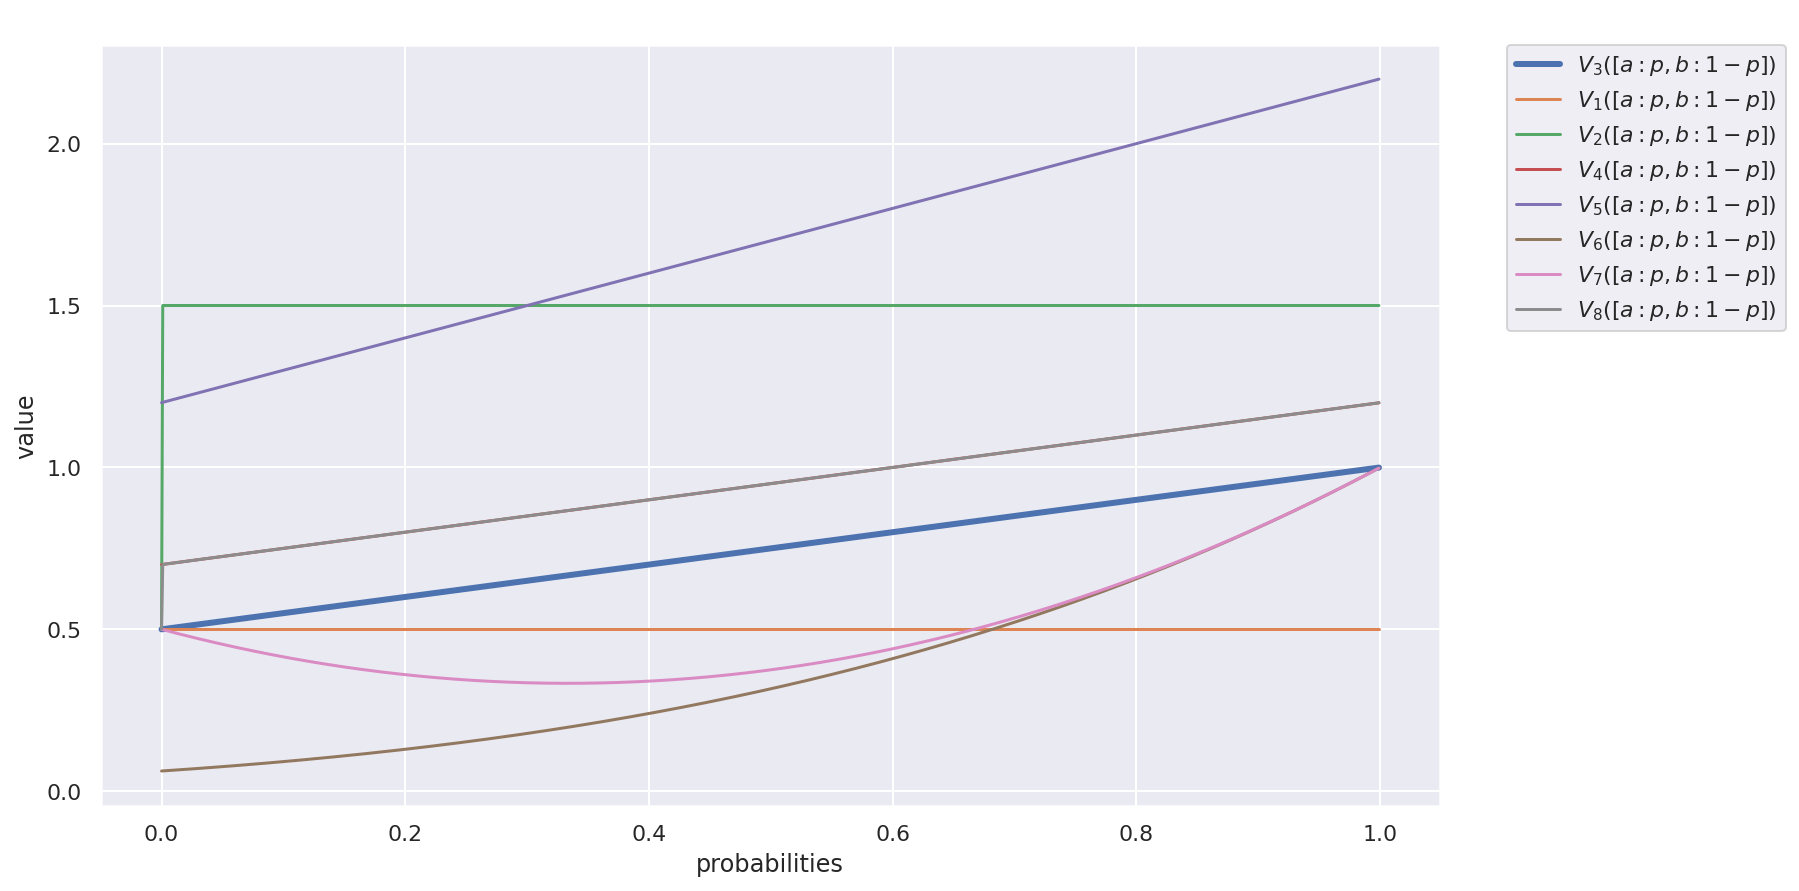

In [72]:
sns.set()
xs = np.arange(0.0, 1.0, 0.001)
fig, ax = plt.subplots()

ys=[v3([x, 1-x, 0]) for x in xs]
ax.plot(xs, ys, lw=3, label="$" + v3.__doc__+ "([a:p, b:1-p])$")

for v in [v1,v2,v4,v5,v6,v7, V8]:
    ys=[v([x, 1-x, 0]) for x in xs]
    ax.plot(xs, ys, lw=1.5, label="$" + v.__doc__+ "([a:p, b:1-p])$")

ax.set(xlabel='probabilities', ylabel='value',
       title=' ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


The von Neumann-Morgenstern Theorem characterizes the  relations on the set of lotteries $\mathcal{L}$  that can be represented by *linear* utility functions. Suppose that $X$ is a set,  $\mathcal{L}$ is the set of lotteries on $X$, and $\succeq$ is a relation on $\mathcal{L}$.  von Neumann and Morgenstern consider the following 4 axioms. 


The first axiom is the standard assumption that rational preferences are complete and transitive: 

**Preference**: The relation $\succeq$ is a complete and transitive relation on $\mathcal{L}$. 


The next two axioms play a central role  von Neumann-Morgenstern theorem.   
 

**Independence**  For all $L_1, L_2, L_3\in\mathcal{L}$ and $p\in (0,1] $, $L_1\succ L_2$ if, and only if, $[L_1:p, L_3:(1-p)]\succ [L_2:p, L_3:(1-p)]$.


**Continuity**  For all $L_1, L_2, L_3\in\mathcal{L}$, if $L_1\succ L_2\succ L_3$, then there exists $p\in (0,1)$ such that  $L_2\sim [L_1:p, L_3:(1-p)]$. 


Both axioms have been criticized as  *rationality* principles.  For example, consider the continuity axiom.  Consider the prizes $x=$ "win \$1000", $y=$ "win \$100" and $z=$ "get hit by a car".   Clearly, it is natural to assume that a decision make would have the preference $x\succ y\succ z$.   Now, Continuity implies that there is some number $a\in (0,1)$ such that $[x:a, z:(1-a)]\succ [y:1]$.  Thus, the decision maker would strictly prefer a lottery in which there is some non-zero chance of getting hit by a car to a lottery in which gives a guaranteed payoff of \$100.  Arguably, many people would not hold such a preference no matter how small the chance is of getting hit by a car.       Here we bracket this are related philosophical discussions about the  above axioms and focus on what follows from the axioms. The first observation is a straightforward consequence of Independence and the assumption that the preference ordering is complete. 

**Lemma** Suppose that $\succeq$ is a preference relation on $\mathcal{L}$ satisfying the Independence axiom.   For all lotteries $L_1, L_2, L_3\in \mathcal{L}$ and real numbers $a\in [0,1]$, if $L_1\sim L_2$, then $[L_1:a,L_3:(1-a)]\sim [L_2:a, L_3:(1-a)]$. 	
 

The second observation is that   decision makers prefers lotteries in which there is a better chance of winning a more  preferred prize.

**Lemma** If $\succeq$ is a preference relation on $\mathcal{L}$ satisfying Compound Lotteries and  Independence, then for all lotteries $L_1, L_2\in \mathcal{L}$, if $L_1\succ L_2$, and  $1\ge a > b\ge 0$, then $[L_1:a, L_2:(1-a)] \succ [L_1:b, L_2:(1-b)]$. 
 

The last axiom concerns *compound lotteries*: 

**Compound Lotteries**:   Suppose that $[L_1:p_1,\ldots, L_n,p_n]$ is a compound lottery, where for each $i=1,\ldots, n$, we have $L_i=[x_1:p_1^i,\ldots, x_n:p_n^i]$.  Then, 
$$[L_1:p_1,\ldots, L_n,p_n]\sim [x_1:(p_1p_1^1+ p_2p_1^2 + \cdots p_np_1^n),\ldots, x_1:(p_1p_n^1+ p_2p_n^2 + \cdots p_np_n^n)]$$   


The axiom means that decision makers do not get any utility from the "thrill of gambling". That is, what matters to the decision maker is how likely she is to receive prizes that she prefers. For example, suppose that    $L_1=[x:1]$ and $L_2=[y_1:0.2, y_2:0.4, y_3:0.4]$.   Then, the decision maker is assumed to be indifferent between the compound lottery $L_3=[L_1:0.3, L_2:0.7]$ and the simple lottery $L_4=[x:0.3, y_1:0.14, y_2:0.28, y_3:0.28]$.

**The von Neumann-Morgentern Representation Theorem**   A binary relation $\succeq$ on $\mathcal{L}$ satisfies Preference, Independence, Continuity and Compound Lotteries iff  $\succeq$ is representable by a linear utility function $V:\mathcal\rightarrow\mathbb{R}$. 

 Moreover,   $V':\mathcal{L}\rightarrow\mathbb{R}$ represents $\succeq$  iff there exists real numbers $c>0$ and $d$ such that  $V'(\cdot)=cV(\cdot)+d$.   ("$V$ is unique up to linear transformations.") 



One consequence of the von Neumann-Morgenstern Theorem is that a preference ordering generated by a value function that is not linear must violate at least one of the von Neumann-Morgenstern axioms.  For instance, consider the value function $V_8$.  This function is not  linear: 
$$V_8([a:0.5, c:0.5]) = 0.5* u(a) + 0.5 * u(c) + 0.2 = 0.7\ne 0.5*V_8([a:1]) + 0.5 * V_8([c:1]) = 0.5$$
(Recall that we identify each item in $X$ with the sure-thing lottery.)

This means that the preference ordering  $\succeq_{V_8}$ generated by $V_8$ must violate at least one the 4 axioms used in the von Neumann-Morgenstern Theorem. 

Since $\succeq_{V_8}$ is represented by a utility function on the lotteries (i.e., it assigns a real number to every lottery), the Utility Theorem shows that $\succeq_{V_8}$  is complete and transitive.  It is also easy to see that $\succeq_{V_8}$ satisfies Compound Lotteries.   

To show that $\succeq_{V_8}$ violates the Independence Axiom, we must find three lotteries $L_1$, $L_2$, $L_3$ and a $p\in (0,1]$ such that $L_1\succeq_{V_8} L_2$ but $[L_1:p, L_3:(1-p)]\not\succeq_{V_8} [L_2:p, L_3:(1-p) ]$. 



In [63]:
# define some variables to simplify the code
A = "a"
B = "b"
C = "c"
 
prizes = [A, B, C]
utils = {A:1, B:0.5, C:0}

# a lottery component is a named tuple with a prize element and pr (probability) element
LC = collections.namedtuple('LC', 'prize pr')

# lotteries are lists of LC objects

def is_sure_thing(L):
    
    return any([lc.prize in prizes and lc.pr == 1 for lc in L])

def is_simple_lottery(L):
    
    return all([type(lc.prize) != list or is_sure_thing(lc.prize) for lc in L])

def get_prize(lc):
    
    prize = None
    
    if type(lc.prize) != list:
        prize = lc.prize
    elif is_sure_thing(lc.prize):
        prize = [_lc.prize for _lc in lc.prize if  _lc.pr == 1][0]

    return prize


def find_value(potential_lottery): 
    
    if type(potential_lottery) != list: 
        return utils[potential_lottery]
    else:
        return sum(find_value(_lc.prize) * _lc.pr for _lc in potential_lottery) - 0.1
    
def print_lottery(L):
    return "[" + ', '.join([str(lc.prize) + ": " + str(lc.pr) for lc in L]) + "]"

def eu(L):
    
    assert sum(lc.pr for lc in L) == 1, "Probabilities in lotteries must sum to 1: {}".format(L)
    
    if is_simple_lottery(L):
        return sum(utils[get_prize(lc)] * lc.pr for lc in L) 
    else:
        return sum(find_value(lc.prize) * lc.pr for lc in L)


def v8(L):
        
    if L in prizes: 
        assert L in utils.keys(), "Error: {} not assigned a utility".format(L)
        val = utils[L]
    else:
        assert sum(lc.pr for lc in L) == 1, "Probabilities in lotteries must sum to 1: {}".format(L)
        
        is_sure_thing = any([lc.prize in prizes and lc.pr == 1 for lc in L])

        if is_sure_thing:
            val = utils[[lc.prize for lc in L if lc.prize in prizes and lc.pr == 1][0]]
        else:
            val = eu(L) + 0.2 
        
    return val
     

In [73]:

L1 = [LC(prize=A, pr=0.1),  
      LC(prize=B,pr=0.0),  
      LC(prize=C,pr=0.9)]

L2 = [LC(prize=A, pr=0.0),  
      LC(prize=B,pr=1.0),  
      LC(prize=C,pr=0.0)]

L = [LC(prize=A, pr=0.0),  
      LC(prize=B,pr=0.0),  
      LC(prize=C,pr=1.0)]



def find_counter_indep(a):
    display(Math("V_8(L_1)=V_8(" + print_lottery(L1) + ")=" + str(round(v8(L1),3))))
    display(Math("V_8(L_2)=V_8(" + print_lottery(L2) + ")=" + str(round(v8(L2),3))))
    display(Math("L_2  \succ_{V_8} L_1"))
    L3 = [LC(prize=L1, pr=a),  
          LC(prize=L,pr=1-a)]

    L4 = [LC(prize=L2, pr=a),  
          LC(prize=L,pr=1-a)]

    if a == 0.0: 
        print("The probability cannot be 0.")
        
    if not v8(L4) > v8(L3): 
        print("This is a violation of the Indpendence Axiom: ")
        display(Math("V_8([L_1: " + str(round(a, 3)) + ", L_3: " + str(round(1-a, 3)) + "])=" + str(round(v8(L3), 3))))
        display(Math("V_8([L_2: " + str(round(a, 3)) + ", L_3: " + str(round(1-a, 3)) + "])=" + str(round(v8(L4), 3))))
        display(Math("[L_1: " + str(round(a, 3)) + ", L_3: " + str(round(1-a, 3)) + "] \\not\succ_{V_8}" + "[L_2: " + str(round(a,3)) + ", L_3: " + str(round(1-a, 3)) + "]"))
    else: 
        print("This is not a violation of the Independence Axiom")
        display(Math("V_8([L_1: " + str(round(a, 3)) + ", L_3: " + str(round(1-a, 3)) + "])=" + str(v8(L3))))
        display(Math("V_8([L_2: " +str(round(a, 3)) + ", L_3: " + str(round(1-a, 3)) + "])=" + str(v8(L4))))
        display(Math("[L_2: " + str(round(a, 3)) + ", L_3: " + str(round(1-a, 3)) + "] \succ_{V_8}" + "[L_1: " + str(round(a, 3)) + ", L_3: " + str(round(1-a, 3)) + "]"))
        
        
print("Consider the lotteries: ")

display(Math("L_1 = " + print_lottery(L1) ))
display(Math("L_2 = " + print_lottery(L2) ))

display(Math("L_3 = " + print_lottery(L) ))
#display(Math("L_2 = " + print_lottery(L2) ))

print("Find a probability that illustrates a violation of the Independence Axiom")

interact(find_counter_indep, 
         a=widgets.FloatSlider(min=0, max=1.0, value=1.0, step=0.01, description="$p$="))
print()

Consider the lotteries: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Find a probability that illustrates a violation of the Independence Axiom


interactive(children=(FloatSlider(value=1.0, description='$p$=', max=1.0, step=0.01), Output()), _dom_classes=…

To show that $\succeq_{V_8}$ violates the Continuity Axiom, we must find three lotteries $L_1$, $L_2$, $L_3$ and a  such that $L_1\succ_{V_8} L_2\succ L_3$ but there is no $p\in (0,1)$ such that  $L_2\sim [L_1:p, L_3:(1-p)]$.

To illustrate, let $L_1=[a:0.5, c:0.5]$, $L_2=[b:1]$ and $L_3=[c:1]$.   We have $L_1\succ_{V_8}L_2\succ_{V_8}L_3$, and note in th graph below that for $p=0.8$, $L_2\sim [L_1:p, L_3:(1-p)]$.  


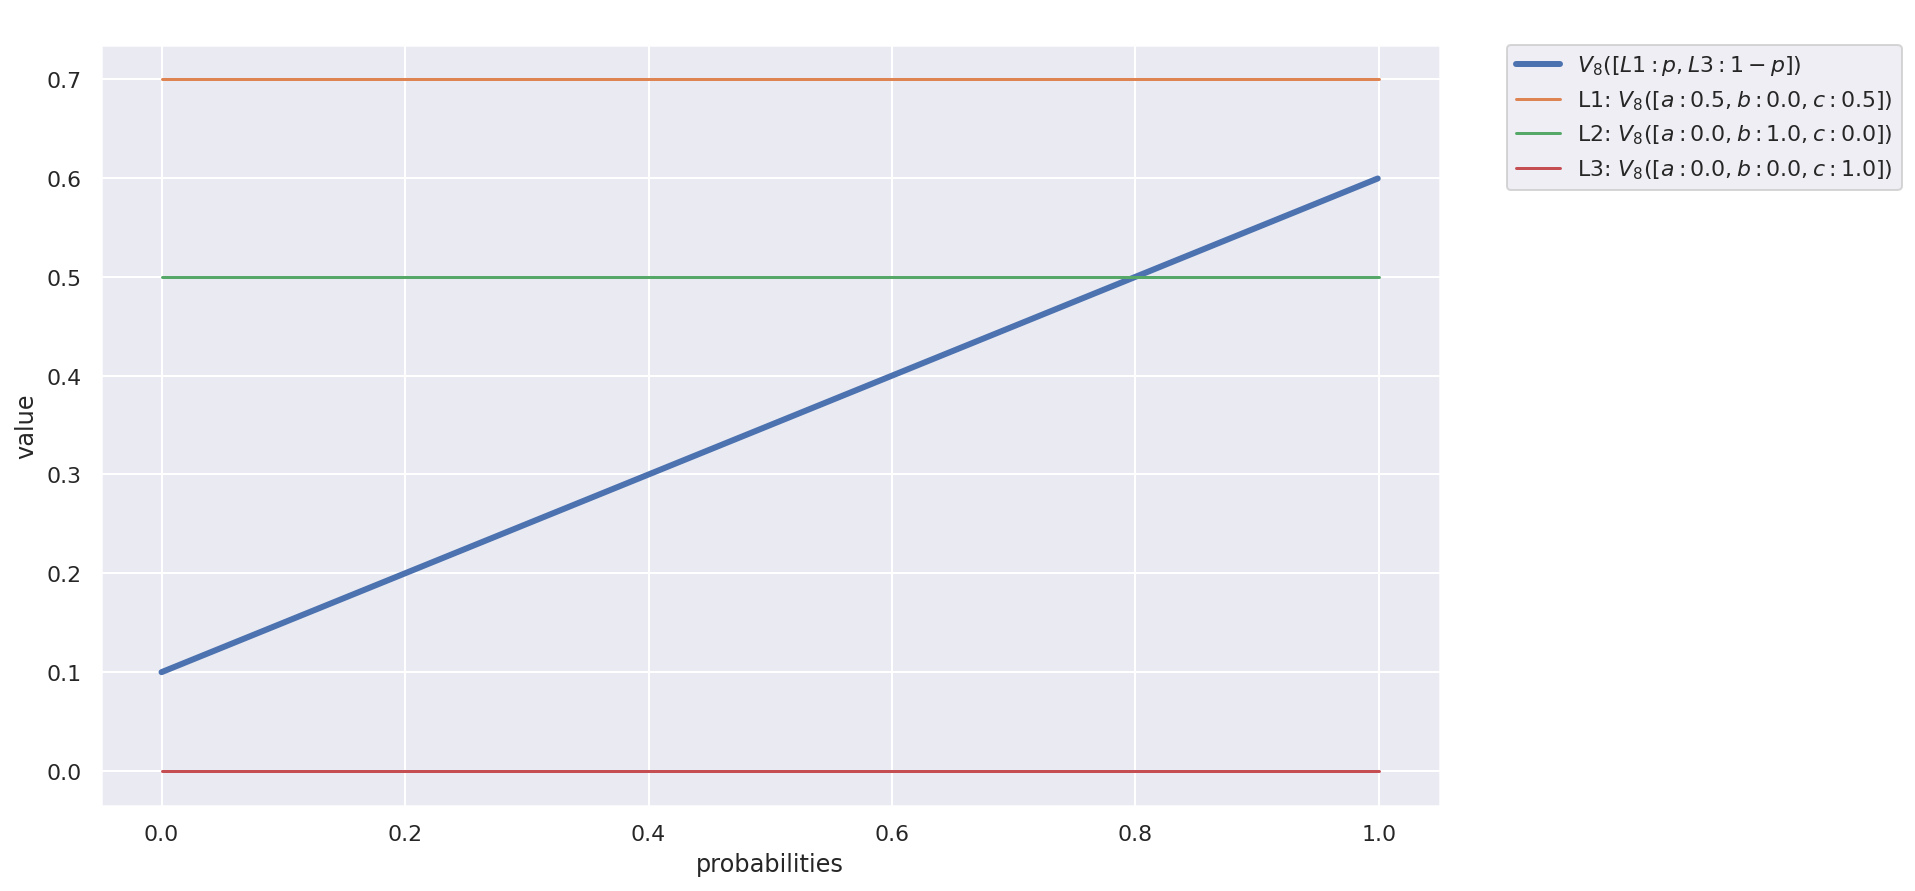

In [74]:
xs = np.arange(0.0, 1.0, 0.001)


L2 = [LC(prize=A, pr=0.0),  
      LC(prize=B, pr=1.0),  
      LC(prize=C, pr=0.0)]

L1 = [LC(prize=A, pr=0.5),  
      LC(prize=B, pr=0.0),  
      LC(prize=C, pr=0.5)]

L3 = [LC(prize=A, pr=0.0),  
      LC(prize=B, pr=0.0),  
      LC(prize=C, pr=1.0)]


ys = [v8([LC(prize=L1, pr=p), LC(prize=L3, pr=(1-p))]) for p in xs] 


#ys_EU = [eu([LC(prize=L1, pr=p), LC(prize=L3, pr=(1-p))]) for p in xs] 
fig, ax = plt.subplots()
ax.plot(xs, ys, lw=3, label="$V_8([L1:p, L3:1-p])$")
#ax.plot(xs, ys_EU, "--", alpha=0.6, lw=2, label="$EU([L1:p, L3:1-p])$")

ax.plot([0,1], [v8(L1), v8(L1)], label="L1: $V_8({})$".format(print_lottery(L1)))
ax.plot([0,1], [v8(L2), v8(L2)], label="L2: $V_8({})$".format(print_lottery(L2)))
ax.plot([0,1], [v8(L3), v8(L3)], label="L3: $V_8({})$".format(print_lottery(L3)))

ax.set(xlabel='probabilities', ylabel='value',
       title=' ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

For the above lotteries:  $L_1=[a:0.5, c:0.5]$  and $L_3=[c:1]$, find a lottery $L_2$ such that: 

1. $L_1\succ L_2\succ L_3$
2. There is no $p$ such that  $L_2\sim [L_1:p, L_3:(1-p)]$.  


In [75]:


def counter_example_continuity(p1,p2,p3):
    
    xs = np.arange(0.0, 1.0, 0.001)

    if math.fabs((p1+p2+p3) - 1) > 0.000000001: 
        print(f"Not a probability: {p1}, {p2}, {p3}")
    else:
        L1 = [LC(prize=A, pr=0.5),  
              LC(prize=B, pr=0.0),  
              LC(prize=C, pr=0.5)]

        L2 = [LC(prize=A, pr=p1),  
              LC(prize=B, pr=p2),  
              LC(prize=C, pr=p3)]

        L3 = [LC(prize=A, pr=0.0),  
              LC(prize=B, pr=0.0),  
              LC(prize=C, pr=1.0)]


        if v8(L1) > v8(L2) and v8(L2)> v8(L3):
            ys = [v8([LC(prize=L1, pr=p), LC(prize=L3, pr=(1-p))]) for p in xs] 


            fig, ax = plt.subplots()
            ax.plot(xs, ys, lw=3, label="$V_8([L1:p, L3:1-p])$")

            ax.plot([0,1], [v8(L1), v8(L1)], label="L1: $V_8({})$".format(print_lottery(L1)))
            ax.plot([0,1], [v8(L2), v8(L2)], label="L2: $V_8({})$".format(print_lottery(L2)))
            ax.plot([0,1], [v8(L3), v8(L3)], label="L3: $V_8({})$".format(print_lottery(L3)))

            ax.set(xlabel='probabilities', ylabel='value',
                   title=' ')
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

            plt.show()
        else: 
            if not v8(L1) > v8(L2):
                display(Math("L_1 = " + print_lottery(L1)))
                display(Math("L_2 = " + print_lottery(L2)))

                display(Math("V_8(L_1) = " + str(round(v8(L1), 3))))
                display(Math("V_8(L_2) = " + str(round(v8(L2), 3))))
                display(Math("L_1\\not\succ L_2"))
                
            if not v8(L2)> v8(L3):
                display(Math("L_2 = " + print_lottery(L2)))
                display(Math("L_3 = " + print_lottery(L3)))
                display(Math("V_8(L_2) = " + str(round(v8(L2), 3))))
                display(Math("V_8(L_3) = " + str(round(v8(L3), 3))))                
                display(Math("L2\\not\succ L_3"))
    
interact_manual(counter_example_continuity, 
                p1=widgets.FloatSlider(min=0.0, max=1.0, value=0.0, step=0.01, description="$p(a)=$"),
                p2=widgets.FloatSlider(min=0.0, max=1.0, value=0.0, step=0.01, description="$p(b)=$"), 
                p3=widgets.FloatSlider(min=0.0, max=1.0, value=0.0, step=0.01, description="$p(c)=$"))

print()

interactive(children=(FloatSlider(value=0.0, description='$p(a)=$', max=1.0, step=0.01), FloatSlider(value=0.0…